# 한글 폰트 설정 

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

#레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Kaggle과 Colab 연동 

In [ ]:
!pip install kaggle 
from google.colab import files 
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minaahayley","key":"3af569f6a8c028e6233a6d29ce2439d3"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle #create folder name Kaggle
!cp kaggle.json ~/.kaggle #copy kaggle.jason into folder Kaggle
!chmod 600 ~/.kaggle/kaggle.json #ignore Permission Warning 

In [ ]:
#다운로드가 제대로 되었는지 확인한다. 
#ls 명령어는 특정 경로에 어떤 파일이 있는지 확인해 보는 명령어다. 
%ls ~/.kaggle

kaggle.json


In [ ]:
#Copy API command 후 데이터셋 다운로드하기  
!kaggle competitions download -c bike-sharing-demand

#파일 압축 풀기
!unzip bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 73.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!mkdir -p ~/.kaggle/competitions/bike-sharing-demand #create folder name Kaggle
!cp sampleSubmission.csv ~/.kaggle/competitions/bike-sharing-demand #copy into folder Kaggle
!cp test.csv ~/.kaggle/competitions/bike-sharing-demand 
!cp train.csv ~/.kaggle/competitions/bike-sharing-demand 

In [ ]:
#다운로드가 제대로 되었는지 확인한다. 
#ls 명령어는 특정 경로에 어떤 파일이 있는지 확인해 보는 명령어다. 
%ls ~/.kaggle/competitions/bike-sharing-demand

sampleSubmission.csv  test.csv  train.csv


# EDA 
* EDA를 하기 전에, 가설 3가지를 설정한다. 
  1. workingday에 자전거 대여량이 늘어날 것이다. 
  2. 출퇴근 시간대에 자전거 대여량이 늘어날 것이다. 
  3. 날씨에 따라 자전거 대여량이 변화할 것이다.


* Target(대여량)을 EDA 했을 때, 대여량이 현저히 적은 날이 있었다. 
그 날(대여량이 8000보다 작은 날)은 대여량이 많은 날에 비해서 Feature에서 어떤 특징이 띄었나?

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
submission = pd.read_csv('~/.kaggle/competitions/bike-sharing-demand/sampleSubmission.csv')
test = pd.read_csv('~/.kaggle/competitions/bike-sharing-demand/test.csv')
train = pd.read_csv('~/.kaggle/competitions/bike-sharing-demand/train.csv')

In [ ]:
train['year'] = pd.to_datetime(train['datetime']).dt.year.astype(int)
train['month'] = pd.to_datetime(train['datetime']).dt.month.astype(int)
train['day'] = pd.to_datetime(train['datetime']).dt.day.astype(int)
train['hour'] = pd.to_datetime(train['datetime']).dt.hour.astype(int)
train['minute'] = pd.to_datetime(train['datetime']).dt.minute.astype(int)
train['second'] = pd.to_datetime(train['datetime']).dt.second.astype(int)
train['dayname'] = pd.to_datetime(train['datetime']).dt.day_name()

test['year'] = pd.to_datetime(test['datetime']).dt.year.astype(int)
test['month'] = pd.to_datetime(test['datetime']).dt.month.astype(int)
test['day'] = pd.to_datetime(test['datetime']).dt.day.astype(int)
test['hour'] = pd.to_datetime(test['datetime']).dt.hour.astype(int)
test['minute'] = pd.to_datetime(test['datetime']).dt.minute.astype(int)
test['second'] = pd.to_datetime(test['datetime']).dt.second.astype(int)
test['dayname'] = pd.to_datetime(test['datetime']).dt.day_name()

In [ ]:
train.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayname
3528,2011-08-16 22:00:00,3,0,1,1,28.7,32.575,61,0.0,31,121,152,2011,8,16,22,0,0,Tuesday


## 왜도(skewness)와 첨도(kurtosis) 확인

데이터 분석에서의 왜도와 첨도는 중요하다. 왜도와 첨도의 수치를 보고 데이터의 치우침 정도를 알 수 있기 때문이다. 

* 왜도
  * 데이터의 분포가 한쪽으로 쏠린것을 의미
  * skew의 수치가 -2~+2 정도가 되어야 치우침이 없는 데이터
  * -2이하는 왼쪽으로 쏠린 데이터 (negative) +2 이상은 오른쪽으로 쏠린 데이터(positive)
    * positive일경우 변환방법 : square root, cube, log(밑10)
    * negative일경우 변환방법 : square, cube root, logarithmic(밑2인log)

* 첨도
  * 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것
  * 한쪽 꼬리부분의 극값과 다른쪽 꼬리의 극값과의 차이를 보여줌
  * 아웃라이어를 찾을 때 주로 사용
  * 첨도가 높다 -> 아웃라이어가 많이 있다

skewness(왜도): 1.242066
kurtosis(첨도): 1.300093


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


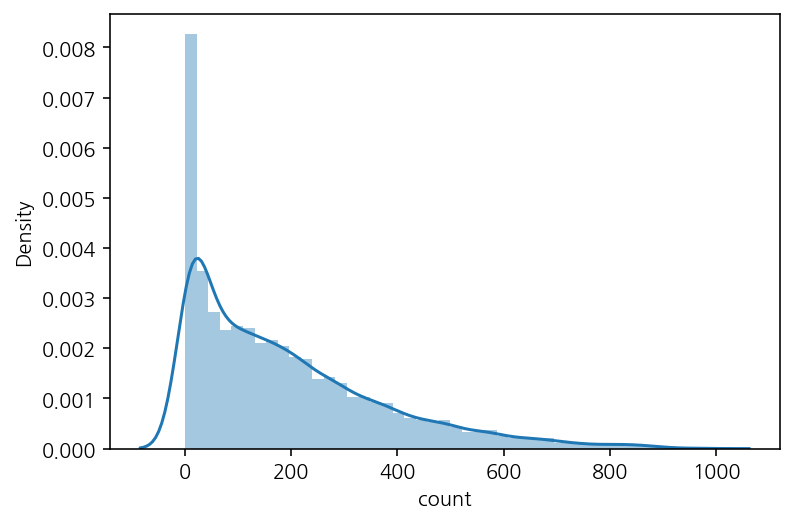

In [ ]:
print('skewness(왜도): %f' %train['count'].skew())
print('kurtosis(첨도): %f' %train['count'].kurt())

sns.distplot(train['count'])

skewness(왜도): 1.524805
kurtosis(첨도): 2.626081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


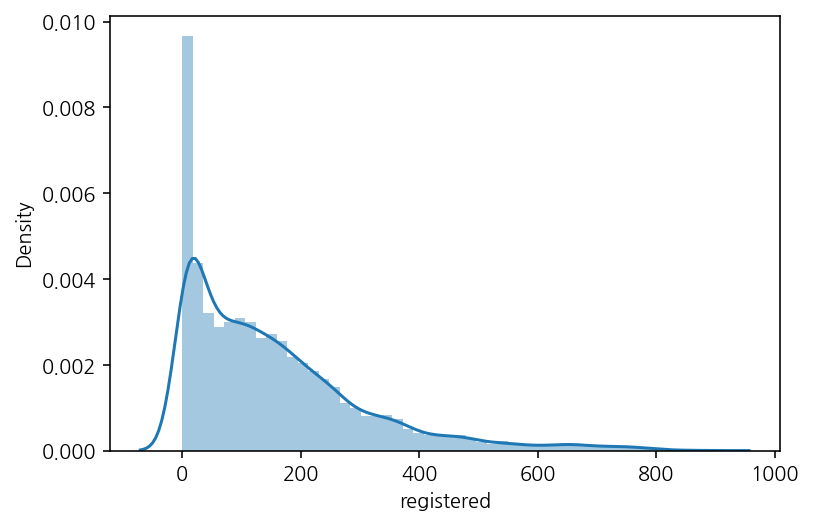

In [ ]:
print('skewness(왜도): %f' %train['registered'].skew())
print('kurtosis(첨도): %f' %train['registered'].kurt())

sns.distplot(train['registered'])

skewness(왜도): 2.495748
kurtosis(첨도): 7.551629


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


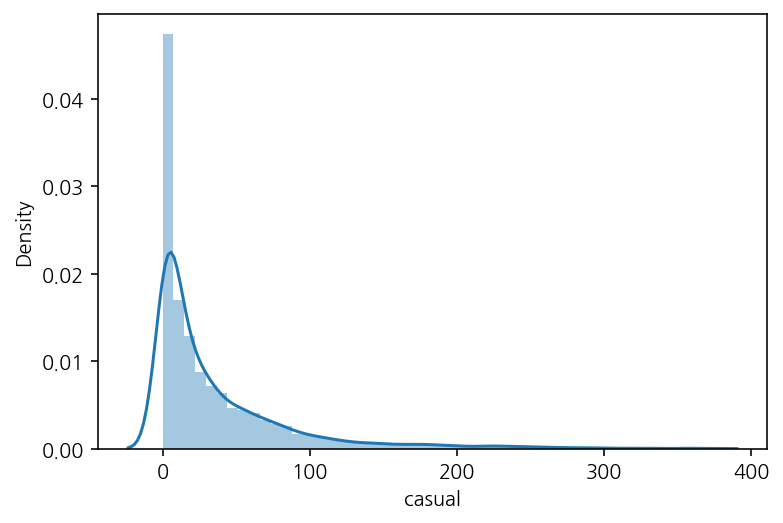

In [ ]:
print('skewness(왜도): %f' %train['casual'].skew())
print('kurtosis(첨도): %f' %train['casual'].kurt())

sns.distplot(train['casual'])

인사이트 
* 수치상으로는 왜도와 첨도에 문제가 없게 출력된다. 
* 하지만, count/casual/registered가 0에 치우쳐져 있는 것을 확인할 수 있다. 
* 정규 분포를 만들기 위해, Log scaling을 통해 정규화 시켜주도록 하자. 
* 여기서 주의할 점은, y값인 count/casual/registered 값에 log를 취해주었으니, 마지막 나온 예측 결과값에 다시 log를 취해주어야 한다! 

## 변수끼리의 상관관계 

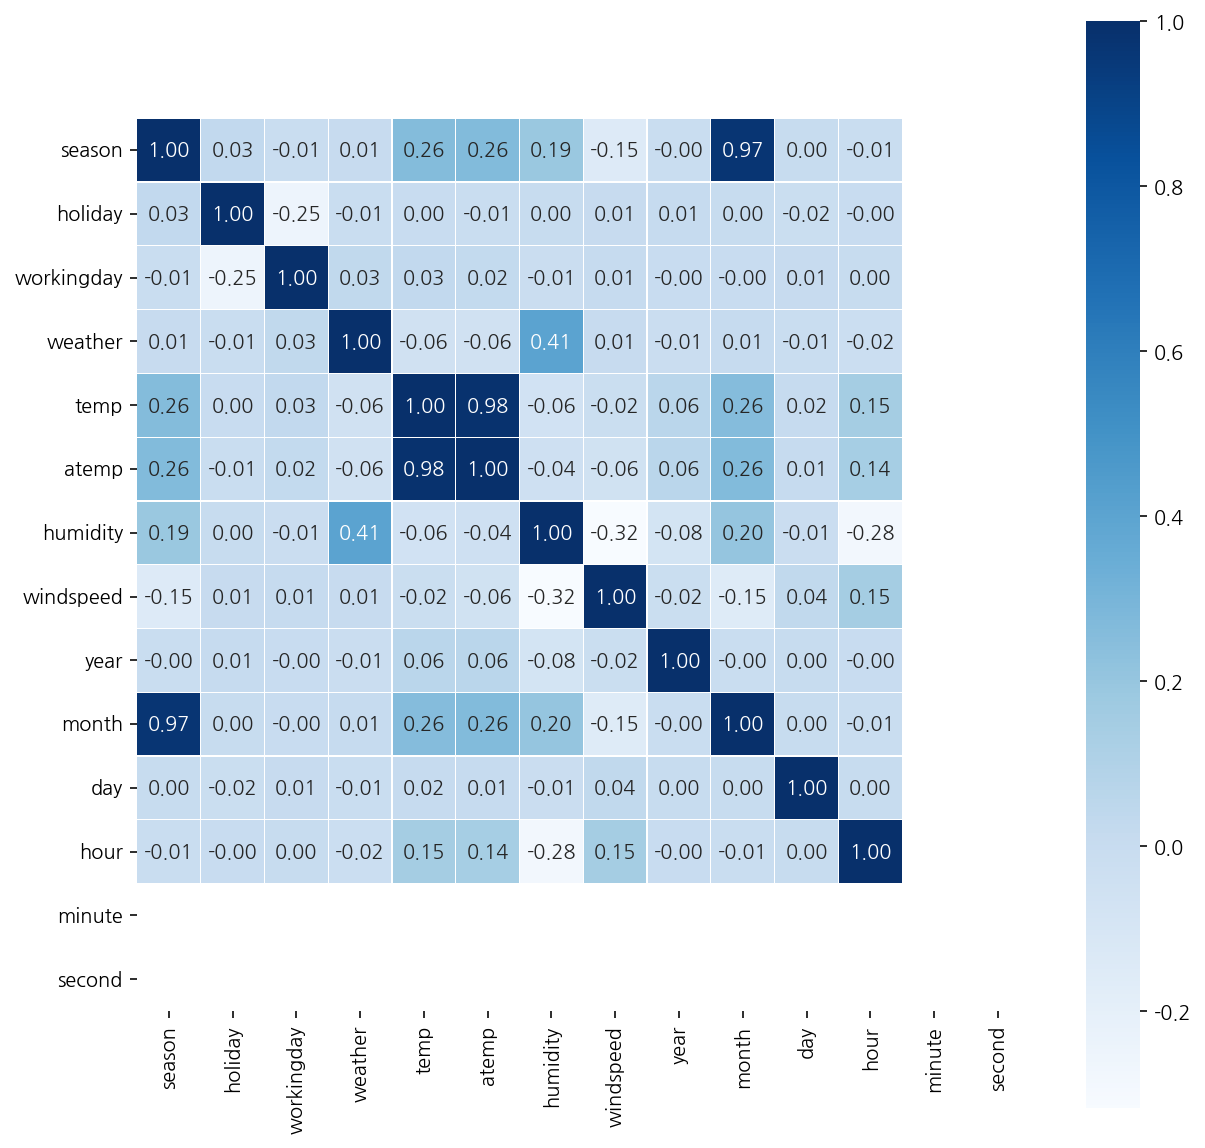

In [ ]:
plt.figure(figsize=(10,10))

# target을 제외한 변수끼리의 상관관계 
corr_data = train.drop(['count','registered','casual'], axis=1)

sns.heatmap(corr_data.corr()
			      , linewidths = 0.1
            , square = True
            , annot = True
            , fmt = '.2f'
            , cmap='Blues')

인사이트 
* temp와 atemp의 상관관계가 높아서 다중공선성이 의심된다. 따라서 atemp 변수 하나만 사용할 것이다. 

## 가설 1: workingday와 자전거 대여량 

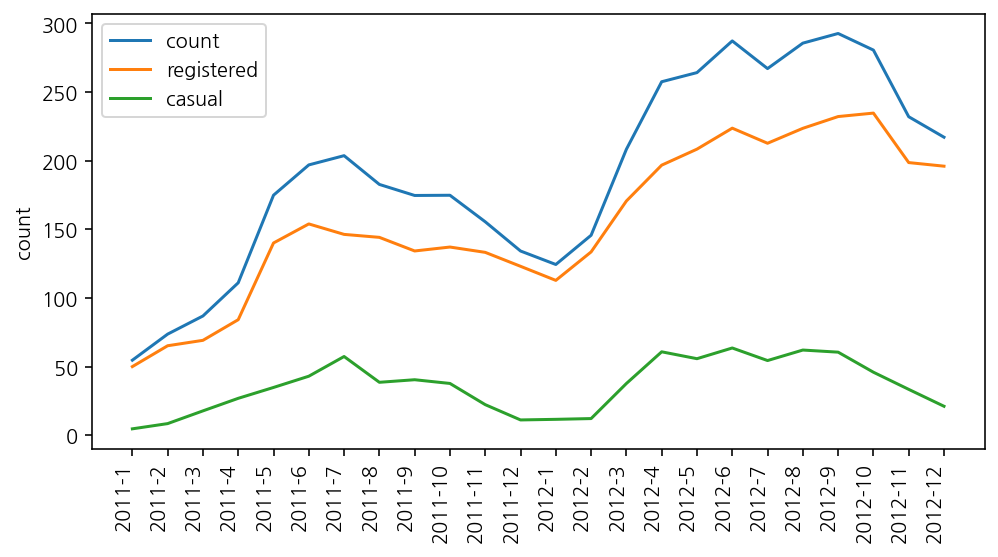

In [ ]:
# 연월별 자전거 대여량 
year_month_day = train['year'].astype(str) + '-' + train['month'].astype(str) 

plt.figure(figsize=(8,4))
plt.xticks(rotation=90, ha='right')
sns.lineplot(x=year_month, y=train['count'], ci=None, label='count')
sns.lineplot(x=year_month, y=train['registered'], ci=None, label='registered')
sns.lineplot(x=year_month, y=train['casual'], ci=None, label='casual')

인사이트 
* 연도별 자전거 대여량이 증가했다. 
* 주로 정기권 사용자의 대여량이 증가했다. 
* 겨울로 갈수록 대여량이 줄어든다.  

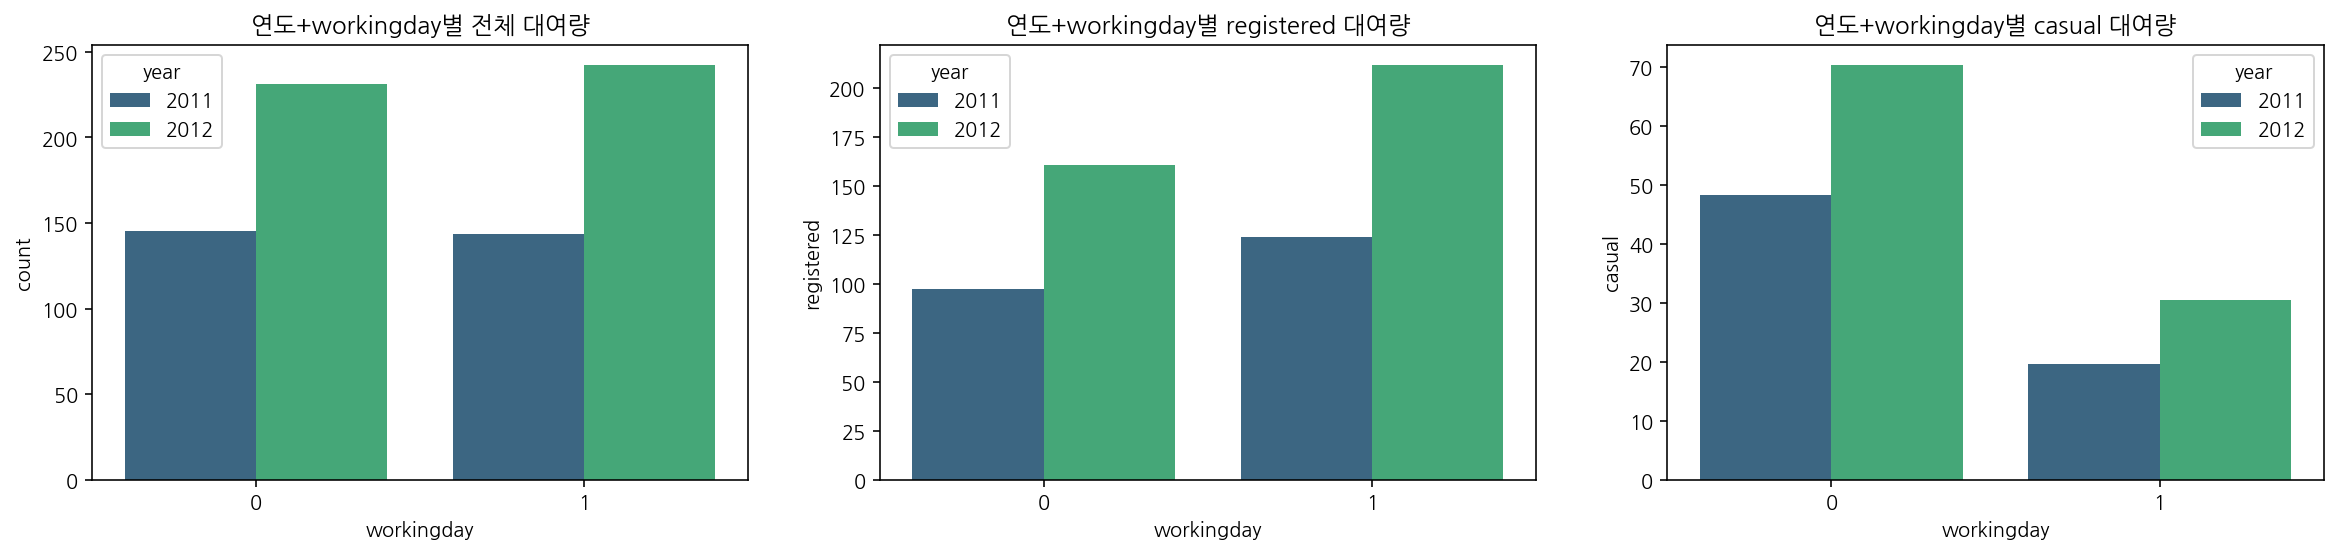

In [ ]:
# 연도 + workingday별 전체 대여량 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,4)

plt.sca(ax1)
plt.title('연도+workingday별 전체 대여량')
sns.barplot(x=train['workingday'], y=train['count'], hue=train['year'], ci=None, palette='viridis', ax=ax1)

plt.sca(ax2)
plt.title('연도+workingday별 registered 대여량')
sns.barplot(x=train['workingday'], y=train['registered'], hue=train['year'], ci=None, palette='viridis', ax=ax2)

plt.sca(ax3)
plt.title('연도+workingday별 casual 대여량')
sns.barplot(x=train['workingday'], y=train['casual'], hue=train['year'], ci=None, palette='viridis', ax=ax3)

인사이트 
* 전체 대여량은 workingday별 차이가 없다. 
* 하지만, 정기 사용자는 workingday에 이용하는 경향성을 보인다. 
* 연도별 대여량을 비교할 때, registered의 유무가 중요한 것으로 보인다. 

## 가설 2: hour와 자전거 대여량

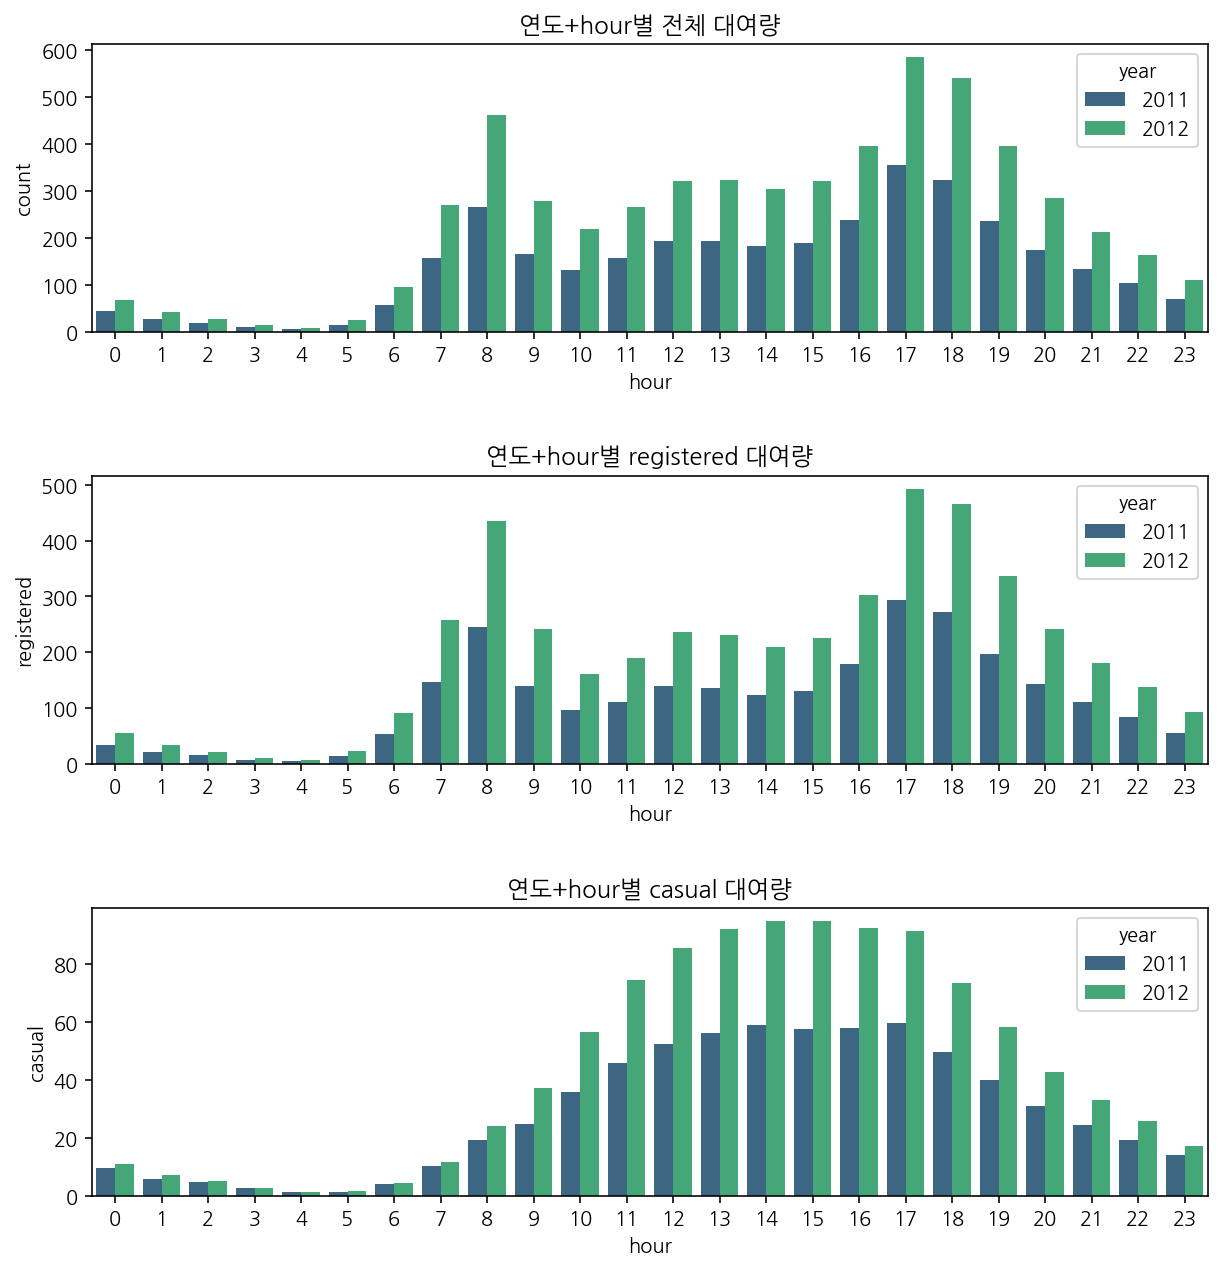

In [ ]:
# 연도 + hour별 전체 대여량 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,10)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.sca(ax1)
plt.title('연도+hour별 전체 대여량')
sns.barplot(x=train['hour'], y=train['count'], hue=train['year'], ci=None, palette='viridis', ax=ax1)

plt.sca(ax2)
plt.title('연도+hour별 registered 대여량')
sns.barplot(x=train['hour'], y=train['registered'], hue=train['year'], ci=None, palette='viridis', ax=ax2)

plt.sca(ax3)
plt.title('연도+hour별 casual 대여량')
sns.barplot(x=train['hour'], y=train['casual'], hue=train['year'], ci=None, palette='viridis', ax=ax3)

인사이트 
* 정기권 사용자는 주로 출퇴근 시간대에 이용한한다. 
* registered 유무에 따라서 hour도 중요한 변수로 생각된다. 

## 가설 3: 날씨와 자전거 대여량 

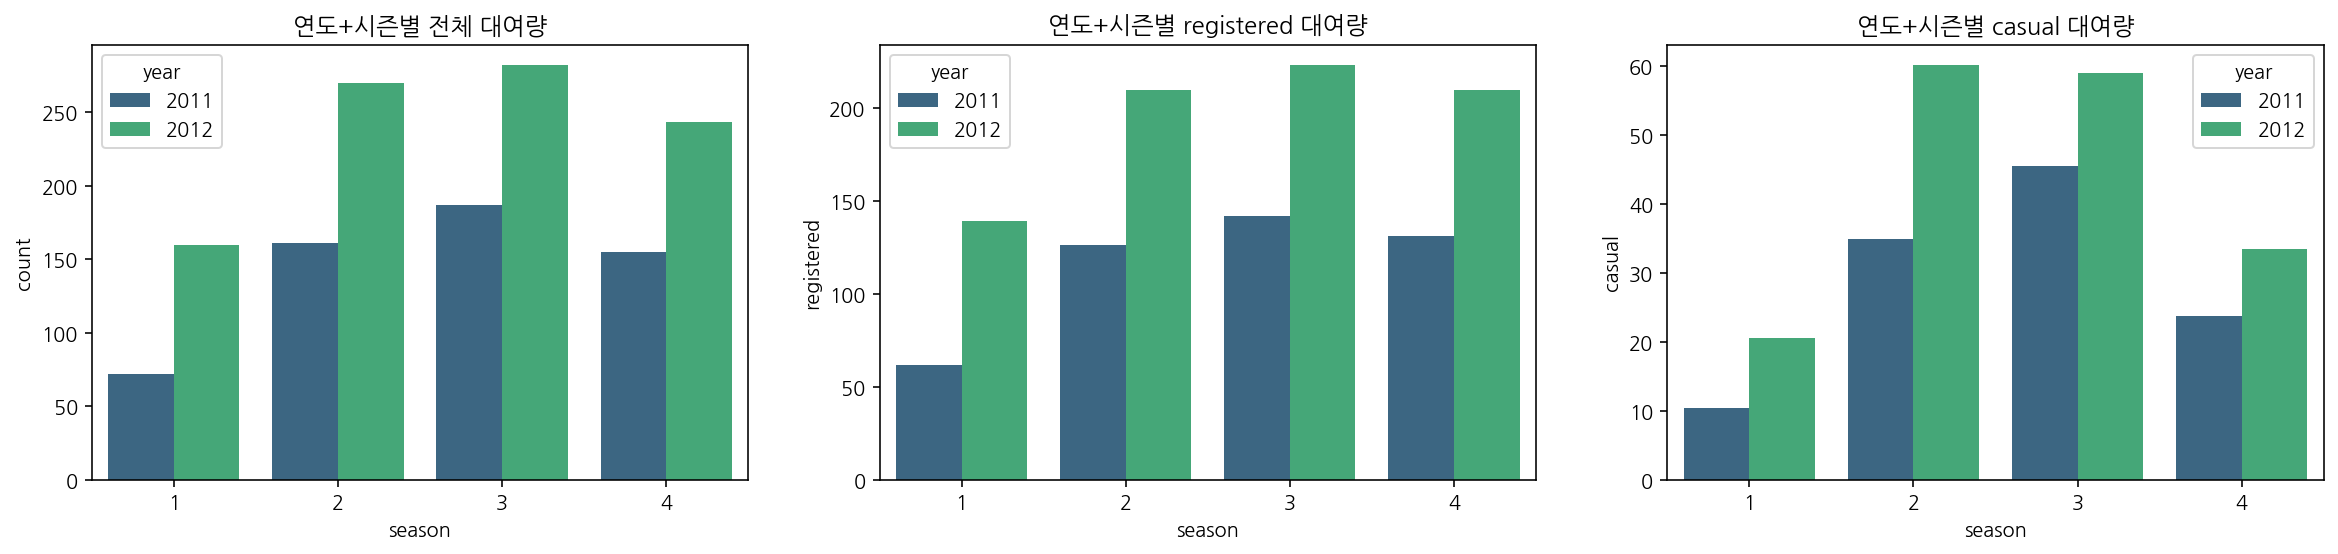

In [ ]:
# 연도 + 시즌별 전체 대여량 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,4)

plt.sca(ax1)
plt.title('연도+시즌별 전체 대여량')
sns.barplot(x=train['season'], y=train['count'], hue=train['year'], ci=None, palette='viridis', ax=ax1)

plt.sca(ax2)
plt.title('연도+시즌별 registered 대여량')
sns.barplot(x=train['season'], y=train['registered'], hue=train['year'], ci=None, palette='viridis', ax=ax2)

plt.sca(ax3)
plt.title('연도+시즌별 casual 대여량')
sns.barplot(x=train['season'], y=train['casual'], hue=train['year'], ci=None, palette='viridis', ax=ax3)

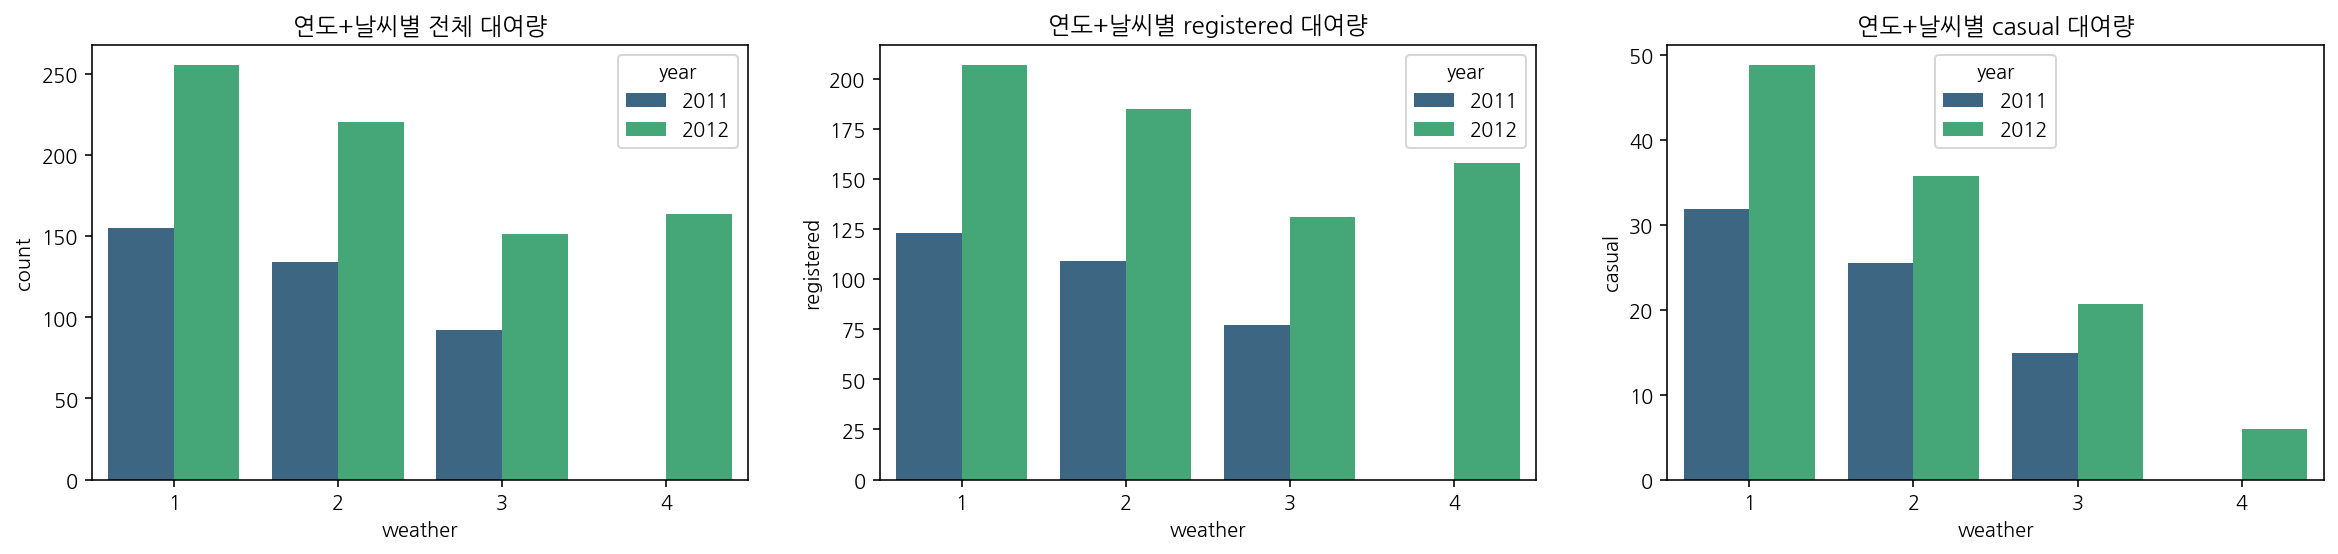

In [ ]:
# 연도 + 날씨별 전체 대여량 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,4)

plt.sca(ax1)
plt.title('연도+날씨별 전체 대여량')
sns.barplot(x=train['weather'], y=train['count'], hue=train['year'], ci=None, palette='viridis', ax=ax1)

plt.sca(ax2)
plt.title('연도+날씨별 registered 대여량')
sns.barplot(x=train['weather'], y=train['registered'], hue=train['year'], ci=None, palette='viridis', ax=ax2)

plt.sca(ax3)
plt.title('연도+날씨별 casual 대여량')
sns.barplot(x=train['weather'], y=train['casual'], hue=train['year'], ci=None, palette='viridis', ax=ax3)

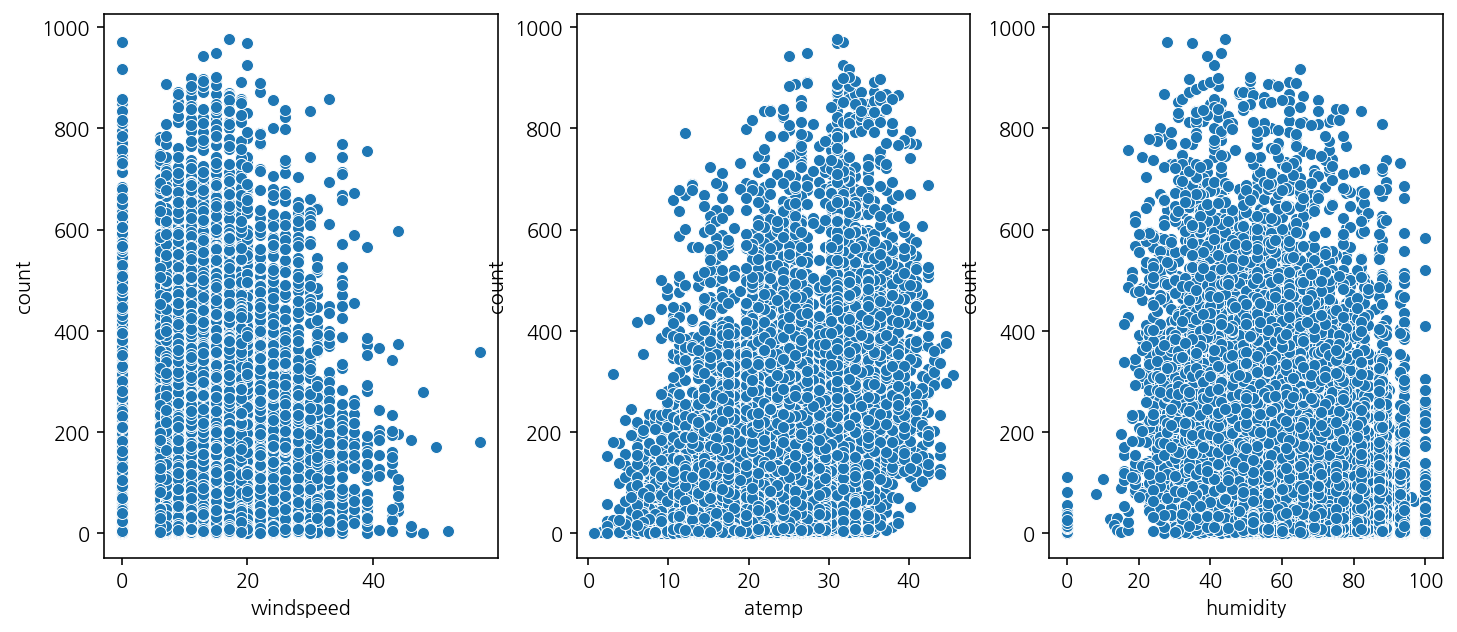

In [ ]:
# 연속형 변수 살펴보기 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'atemp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

인사이트 
* 풍속 0에 데이터가 몰려있다. 
* windspeed가 0인 것을 대체하는 feature engineering 과정이 필요하다. 

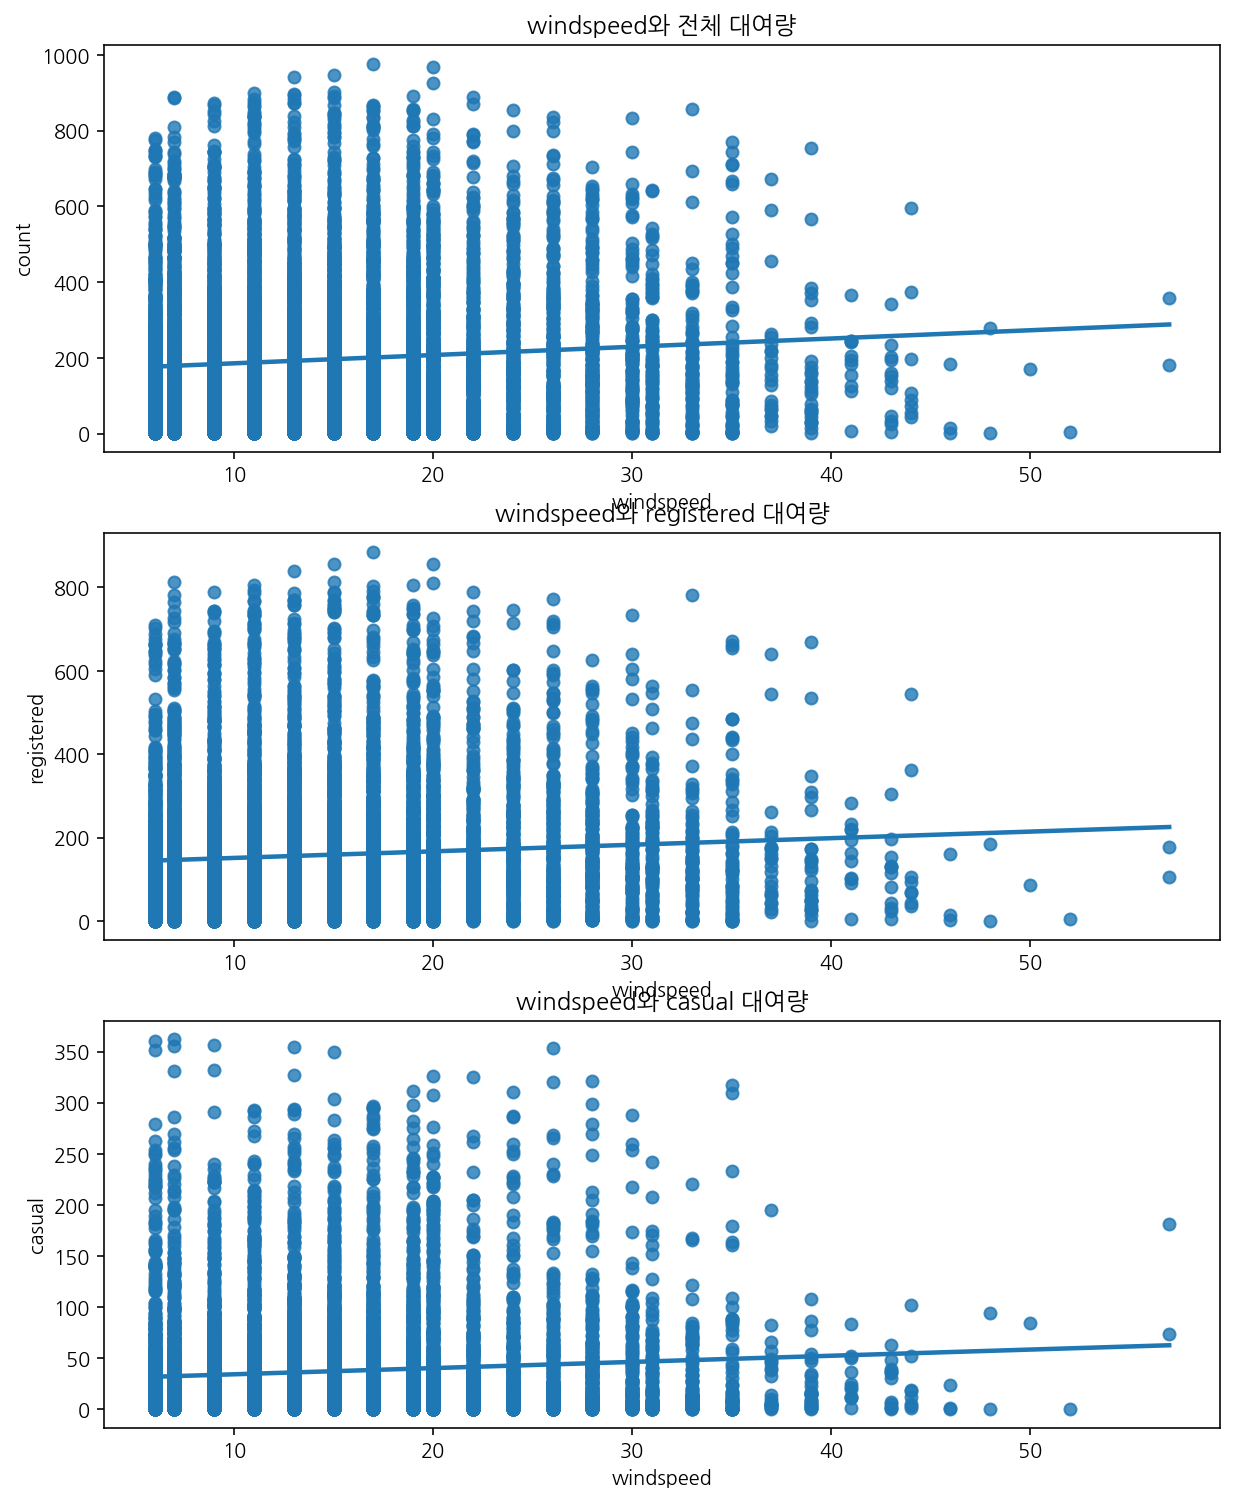

In [ ]:
# 풍속 0을 제외한 windspeed와 대여량의 상관관계 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

w_train = train[train['windspeed'] != 0]

plt.sca(ax1)
plt.title('windspeed와 전체 대여량')
sns.regplot(x=w_train['windspeed'], y=w_train['count'], ci=None, ax=ax1)

plt.sca(ax2)
plt.title('windspeed와 registered 대여량')
sns.regplot(x=w_train['windspeed'], y=w_train['registered'], ci=None, ax=ax2)

plt.sca(ax3)
plt.title('windspeed와 casual 대여량')
sns.regplot(x=w_train['windspeed'], y=w_train['casual'], ci=None, ax=ax3)

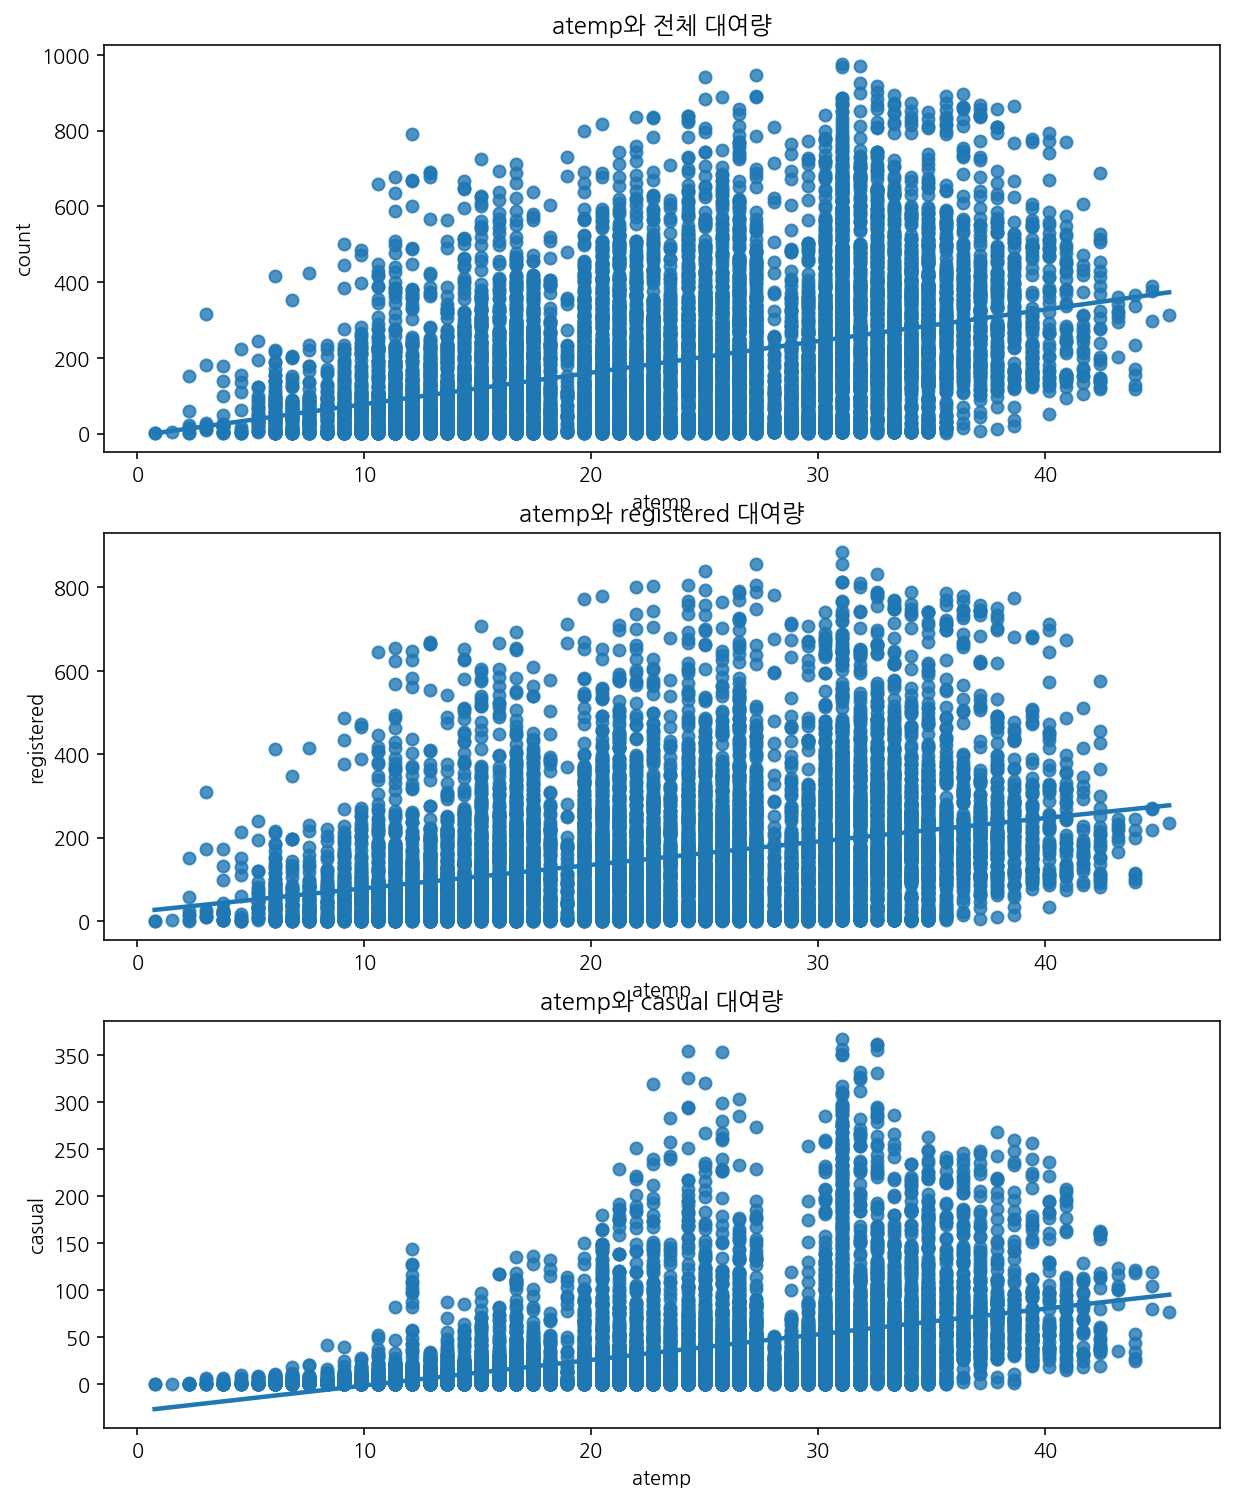

In [ ]:
# atemp와 대여량의 상관관계 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.sca(ax1)
plt.title('atemp와 전체 대여량')
sns.regplot(x=train['atemp'], y=train['count'], ci=None, ax=ax1)

plt.sca(ax2)
plt.title('atemp와 registered 대여량')
sns.regplot(x=train['atemp'], y=train['registered'], ci=None, ax=ax2)

plt.sca(ax3)
plt.title('atemp와 casual 대여량')
sns.regplot(x=train['atemp'], y=train['casual'], ci=None, ax=ax3)

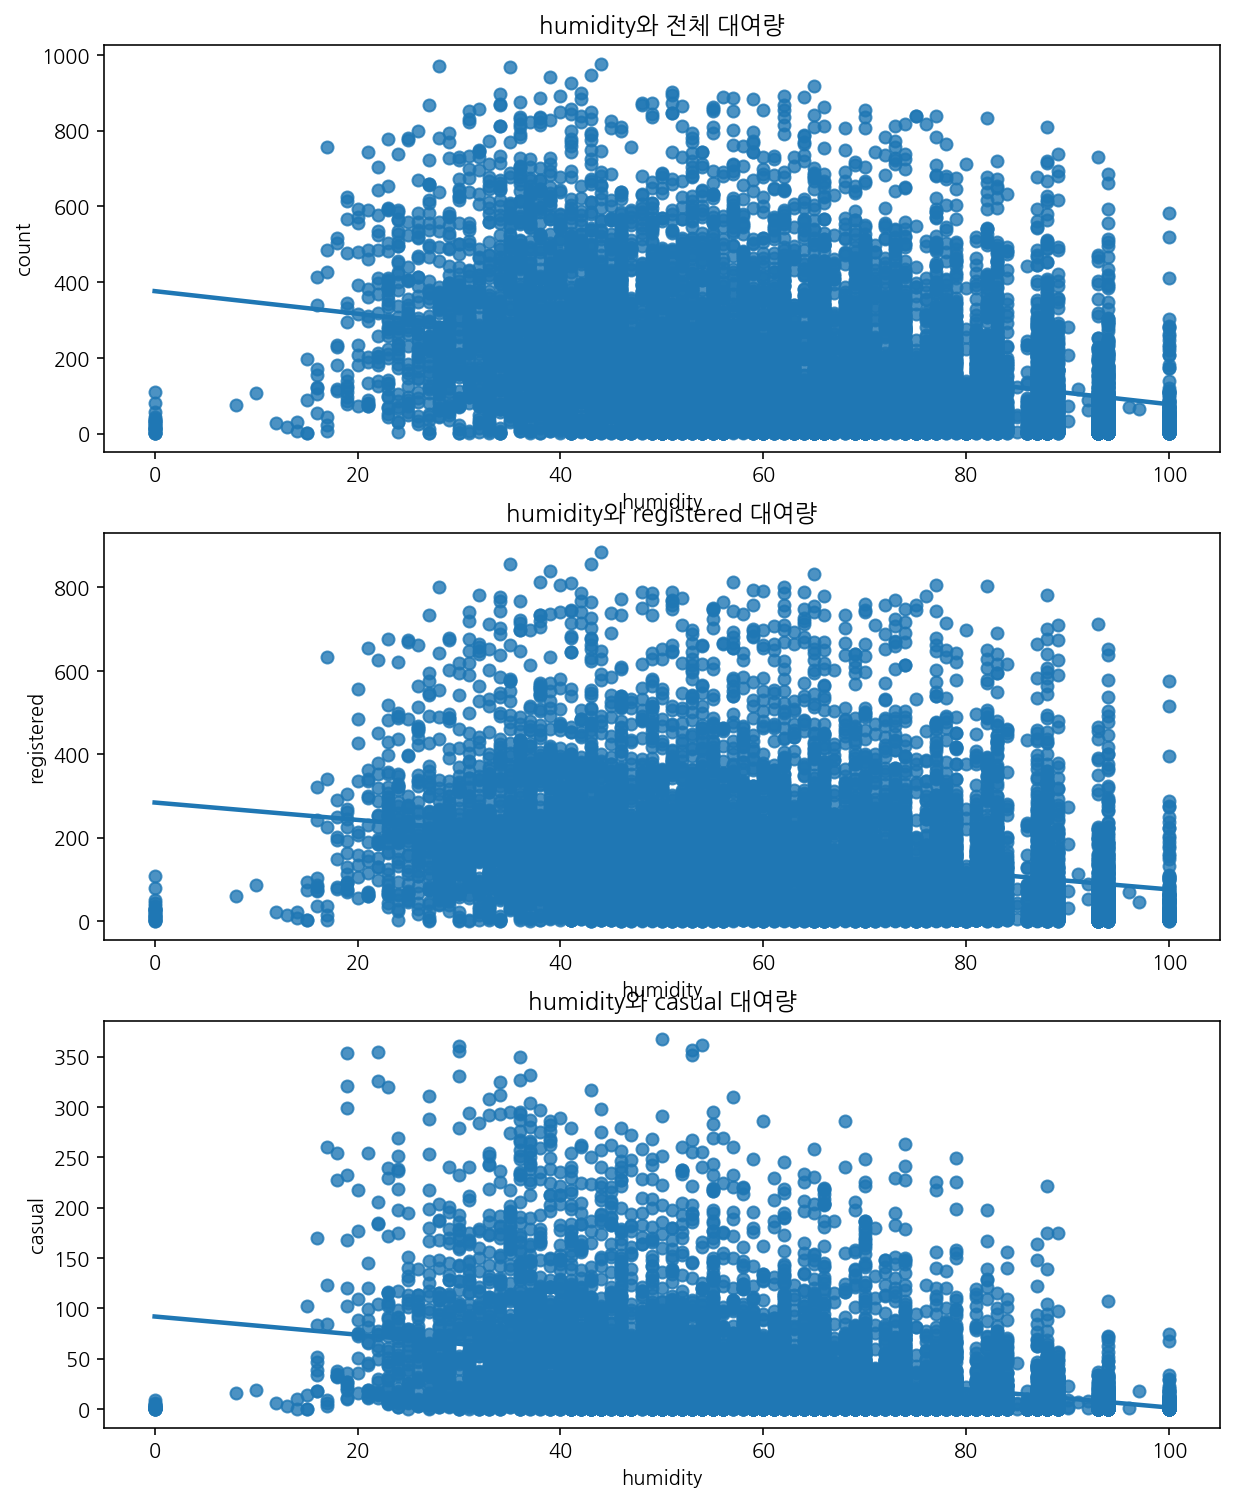

In [ ]:
# humidity와 대여량의 상관관계 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.sca(ax1)
plt.title('humidity와 전체 대여량')
sns.regplot(x=train['humidity'], y=train['count'], ci=None, ax=ax1)

plt.sca(ax2)
plt.title('humidity와 registered 대여량')
sns.regplot(x=train['humidity'], y=train['registered'], ci=None, ax=ax2)

plt.sca(ax3)
plt.title('humidity와 casual 대여량')
sns.regplot(x=train['humidity'], y=train['casual'], ci=None, ax=ax3)

인사이트 
* 풍속과 온도는 대여량의 양의 상관관계를 가진다. 
* 습도는 대여량과 음의 상관관계를 가진다. 

# 결론 


1. temp와 atemp의 상관관계가 높아서 다중공선성이 의심된다. 
  * atemp 변수 하나만 사용한다. 

2. 연도별 대여량이 증가했다. 출퇴근하는 registered 대여량이 증가했다.
  * year, workingday, hour 변수를 선택한다. 

3. count 값이 0에 몰려있다. 
  * 정규 분포를 만들기 위해 Log scaling을 하고, 마지막에 다시 log를 씌워준다.   

3. 날씨에 따라 대여량이 변화한다. 풍속 0에 데이터가 몰려있다.
  * 날씨와 관련된 변수는 모두 피처로 선택한다. 
  * windspeed가 0인 값을 대체해야 한다. 